In [288]:
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

custom_colors = sns.color_palette("crest", 3)
jco_cmap = ListedColormap(custom_colors)

sns.set_theme(palette='crest', font='Sans-Serif')
plt.style.use('Solarize_Light2')

In [289]:
data1 = pd.read_csv('C:/Users/rosic/Desktop/CreditESGproject/creditESG.csv') 
data1

,ID,sectors,regions,ESG_class,ESG_score,final_rating_env,final_normalized_score_env,final_rating_social,final_normalized_score_social,final_rating_governance,...,turnover_2020,EBIT_2022,EBIT_2021,EBIT_2020,net_income_2022,net_income_2021,net_income_2020,EBITDA_2022,EBITDA_2021,EBITDA_2020
0,1,"Transport, Freight & Storage",Molise,S2,0.778571,S1,0.928571,S4,0.500000,S2,...,2001.68,-26.1,33.059,28.523,-59.142,10.07,7.774,-5.997,87.853,87.302
1,2,"Transport, Freight & Storage",Molise,S4,0.592857,S4,0.500000,S3,0.642857,S3,...,1310.188,144.39,72.782,120.94,116.078,62.305,95.386,181.984,127.759,201.086
2,3,Retail,Molise,S4,0.600000,S5,0.357143,S1,0.928571,S3,...,21726.706,820.569,844.751,94.776,371.751,570.786,29.402,845.887,868.997,116.349
3,4,Wholesale,Molise,S4,0.564286,S2,0.785714,S3,0.642857,S5,...,15892.698,508.414,1358.599,977.218,242.706,836.803,582.868,569.13,1398.229,1015.764
4,5,"Travel, Personal & Leisure",Molise,S3,0.664286,S2,0.785714,S4,0.500000,S3,...,7711.445,1161.901,825.696,419.474,746.424,416.812,257.816,1832.73,1380.322,851.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,1891,Business Services,Calabria,S2,0.785714,NaN,NaN,NaN,NaN,S2,...,3,-6.827,0.399,n.a.,228.092,0.157,n.a.,-5.446,0.99,n.a.
1891,1892,Business Services,Calabria,S3,0.642857,NaN,NaN,NaN,NaN,S3,...,0.001,-2.637,-0.419,-0.543,-2.637,-0.418,-0.541,n.a.,n.a.,n.a.
1892,1893,Business Services,Veneto,S1,0.928571,NaN,NaN,NaN,NaN,S1,...,0.001,-73.394,-72.137,-89.85,8426.605,3427.861,534.155,n.a.,n.a.,-79.879
1893,1894,Utilities,Molise,S3,0.642857,NaN,NaN,NaN,NaN,S3,...,4.021,-7.179,-6.059,-2.243,-7.179,-6.059,-2.243,-6.847,-5.756,-2.153


# Pre-processing

In [290]:
data1.drop(columns=['turnover_2020'], inplace=True)

In [291]:
import numpy as np
# Replace empty spaces and "n.a." with NaN
df = data1.replace('^\s*$', np.nan, regex=True)
df = data1.replace('n.a.', np.nan, regex=False)

# Counting NaN and zeros per row
nan_count = df.isna().sum()

zero_count = df.apply(lambda col: col.map(lambda x: pd.to_numeric(x, errors='coerce') == 0)).sum()

summary = pd.DataFrame({
    'NaN Count': nan_count,
    'Zero Count': zero_count
})

print(summary)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\3653262493.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = data1.replace('^\s*$', np.nan, regex=True)


                                   NaN Count  Zero Count
ID                                         0           0
sectors                                    3          30
regions                                    3           0
ESG_class                                  0           0
ESG_score                                  0           0
final_rating_env                          44           0
final_normalized_score_env                44           0
final_rating_social                      180           0
final_normalized_score_social            180           0
final_rating_governance                  235           0
final_normalized_score_governance        235           0
MORE_score_2022                            3         333
MORE_score_2021                            3          29
MORE_score_2020                            3          60
total_assets_2022                        341           0
total_assets_2021                         28           0
total_assets_2020              

In [292]:
for col in df.columns:
    if '' in df[col]:
        print(f'found blank space in column {col}')

In [293]:
column_names = df.columns[1:40]
data_types = {col: df[col].dtype for col in column_names}
print(data_types)

{'sectors': dtype('O'), 'regions': dtype('O'), 'ESG_class': dtype('O'), 'ESG_score': dtype('float64'), 'final_rating_env': dtype('O'), 'final_normalized_score_env': dtype('float64'), 'final_rating_social': dtype('O'), 'final_normalized_score_social': dtype('float64'), 'final_rating_governance': dtype('O'), 'final_normalized_score_governance': dtype('float64'), 'MORE_score_2022': dtype('O'), 'MORE_score_2021': dtype('O'), 'MORE_score_2020': dtype('O'), 'total_assets_2022': dtype('O'), 'total_assets_2021': dtype('O'), 'total_assets_2020': dtype('O'), 'current_assets_2022': dtype('O'), 'current_assets_2021': dtype('O'), 'current_assets_2020': dtype('O'), 'shareholders_funds_2022': dtype('O'), 'shareholders_funds_2021': dtype('O'), 'shareholders_funds_2020': dtype('O'), 'current _liabilities_2022': dtype('O'), 'current _liabilities_2021': dtype('O'), 'current _liabilities_2020': dtype('O'), 'turnover_2022': dtype('O'), 'turnover_2021': dtype('O'), 'EBIT_2022': dtype('O'), 'EBIT_2021': dtyp

In [294]:
print(df.columns[14:40])

Index(['total_assets_2022', 'total_assets_2021', 'total_assets_2020',
       'current_assets_2022', 'current_assets_2021', 'current_assets_2020',
       'shareholders_funds_2022', 'shareholders_funds_2021',
       'shareholders_funds_2020', 'current _liabilities_2022',
       'current _liabilities_2021', 'current _liabilities_2020',
       'turnover_2022', 'turnover_2021', 'EBIT_2022', 'EBIT_2021', 'EBIT_2020',
       'net_income_2022', 'net_income_2021', 'net_income_2020', 'EBITDA_2022',
       'EBITDA_2021', 'EBITDA_2020'],
      dtype='object')


In [295]:
for col in df.columns[14:40]:
    try:
        df[col] = df[col].astype('float64')
    except ValueError:
        print(f"Could not convert column '{col}' to float64. It might contain non-numeric values.")

In [296]:
# I drop the observations with missing sector classification
df['sectors'] = df['sectors'].replace([0, 0.0, '0', '0.0'], np.nan)
original_row_count = len(df)
df = df.dropna(subset=['sectors'])
deleted_rows_count = original_row_count - len(df)
print(f"Number of rows deleted: {deleted_rows_count}")

Number of rows deleted: 33


In [297]:
# Preprocessing the sectors variable by creating 5 macroregions
# Mapping regions to macro regions
region_mapping = {
    'Islands': ["Sicilia", "Sardegna"],
    'South': ["Campania", "Calabria", "Basilicata", "Puglia", "Abruzzo", "Molise"],
    'Northeast': ["Emilia-Romagna", "Friuli-Venezia Giulia", "Trentino-Alto Adige", "Veneto"],
    'Northwest': ["Piemonte", "Lombardia", "Liguria", "Valle D'Aosta"],
    'Center': ["Lazio", "Toscana", "Marche", "Umbria"]
}

# Map region names to macro regions
df['regions'] = df['regions'].apply(
    lambda x: next((macro_region for macro_region, regions in region_mapping.items() if x in regions), None)
)

In [298]:
# Preprocessing the sectors variable by creating 5 macrosectors
# Mapping sectors to macro sectors
sectors_mapping = {
    'Consumer': [
        "Agriculture, Horticulture & Livestock", "Retail",
        "Travel, Personal & Leisure", "Printing & Publishing", "Wholesale"
        ],
    'Financials': ["Banking, Insurance & Financial Services", "Property Services",
                   "Business Services"
                   ],
    'Health.Util': [
        "Public Administration, Education, Health Social Services",
        "Utilities", "Transport, Freight & Storage"
    ],
    'Manufacturing': [
        "Chemicals, Petroleum, Rubber & Plastic", "Construction", "Industrial, Electric & Electronic Machinery",
        "Leather, Stone, Clay & Glass products", "Metals & Metal Products", "Mining & Extraction", "Textiles & Clothing Manufacturing"
        ,"Wood, Furniture & Paper Manufacturing", "Miscellaneous Manufacturing", "Transport Manufacturing", "Waste Management & Treatment", 
        "Food & Tobacco Manufacturing"
    ],
    'Tech.Com': [
        "Biotechnology and Life Sciences", "Communications", "Computer Hardware", "Computer Software", "Media & Broadcasting"
    ]
}

# Map region names to macro sectors
df['sectors'] = df['sectors'].apply(
    lambda x: next((macro_sectors for macro_sectors, sectors in sectors_mapping.items() if x in sectors), None)
)

 ### Imputation of NaN

#### ESG data

In [299]:
# E,S and G scores statistics with respect to the sectors
score_columns = ['final_normalized_score_env', 'final_normalized_score_social', 'final_normalized_score_governance']
sector_stats = df.groupby('sectors')[score_columns].agg(['mean', 'std','median'])
print(sector_stats)

              final_normalized_score_env                      \
                                    mean       std    median   
sectors                                                        
Consumer                        0.664502  0.207290  0.785714   
Financials                      0.865714  0.130607  0.928571   
Health.Util                     0.788199  0.187367  0.785714   
Manufacturing                   0.736090  0.159849  0.785714   
Tech.Com                        0.878571  0.111907  0.928571   

              final_normalized_score_social                   \
                                       mean       std median   
sectors                                                        
Consumer                           0.457319  0.233449    0.5   
Financials                         0.503297  0.268931    0.5   
Health.Util                        0.499267  0.237233    0.5   
Manufacturing                      0.527360  0.229815    0.5   
Tech.Com                           0.50

In [300]:
score_columns = ['final_normalized_score_env', 'final_normalized_score_social', 'final_normalized_score_governance']
# USE MEAN OF THE 3  THINGS IF NOT DELETE COLUMN

# Impute missing values based on sector
for col in score_columns:
    if col == 'final_normalized_score_env':
        # Calculate the median for each sector
        sector_medians = df.groupby('sectors')[col].transform('median')
        # Fill NaN values with the sector median
        df[col] = df[col].where(~df[col].isna(), sector_medians)
    else:
        # Calculate the mean for each sector
        sector_means = df.groupby('sectors')[col].transform('mean')
        # Fill NaN values with the sector mean
        df[col] = df[col].where(~df[col].isna(), sector_means)

I chose a mixed approach for imputing missing values to better capture sector-specific nuances in the data. By using the mean for sectors with low variance and the median for sectors with high variance, this approach ensures that imputation reflects each sector’s unique distribution. This minimizes the influence of outliers in volatile sectors while preserving subtle variations in stable sectors. As a result, the mixed approach improves the model’s ability to learn from sector-specific patterns, enhancing classification accuracy and interpretability.

#### Credit data

In [301]:
# Financial data statistics with respect to the sectors
credit_columns = df.columns[14:40]
sector_stats_credit = df.groupby('sectors')[credit_columns].agg(['mean', 'std', 'median'])
print(sector_stats_credit)

              total_assets_2022                           total_assets_2021  \
                           mean           std      median              mean   
sectors                                                                       
Consumer           84725.270005  2.064170e+05  18870.4410      69381.594766   
Financials        125612.338350  3.809800e+05  22173.1430     122079.481130   
Health.Util       324622.180984  1.506669e+06  27690.4540     442006.035480   
Manufacturing     144948.337944  3.413504e+05  54037.7955     122522.712571   
Tech.Com           90164.962446  1.852217e+05  27960.9255      68166.339194   

                                        total_assets_2020                \
                        std      median              mean           std   
sectors                                                                   
Consumer       1.706191e+05  16072.7440      60531.878964  1.405192e+05   
Financials     3.747446e+05  20659.8425     109200.310049  3.170897

In [302]:
# To replace NaN values with the sector mean
# Loop over each column, calculate the sector-wise mean, and fill only NaN values with the sector mean
for col in credit_columns:
    # Calculate the mean for each sector in the current column
    sector_means = df.groupby('sectors')[col].transform('mean')
    df[col] = df[col].where(~df[col].isna(), sector_means)

In [303]:
# Counting NaN and zeros per row
nan_count = df.isna().sum()

zero_count = df.apply(lambda col: col.map(lambda x: pd.to_numeric(x, errors='coerce') == 0)).sum()

summary = pd.DataFrame({
    'NaN Count': nan_count,
    'Zero Count': zero_count
})

print(summary)

                                   NaN Count  Zero Count
ID                                         0           0
sectors                                    0           0
regions                                    0           0
ESG_class                                  0           0
ESG_score                                  0           0
final_rating_env                          43           0
final_normalized_score_env                 0           0
final_rating_social                      177           0
final_normalized_score_social              0           0
final_rating_governance                  228           0
final_normalized_score_governance          0           0
MORE_score_2022                            0         327
MORE_score_2021                            0          29
MORE_score_2020                            0          59
total_assets_2022                          0           0
total_assets_2021                          0           0
total_assets_2020              

In [304]:
# Filter out rows with two or more zeros across the three score columns
mask = (
    ((df['MORE_score_2022'] == '0') +
     (df['MORE_score_2021'] == '0') +
     (df['MORE_score_2020'] == '0')) >= 2
)
df = df[~mask].reset_index(drop=True)

# Filter out rows where 'MORE_score_2020' is '0'
df = df[df['MORE_score_2020'] != '0'].reset_index(drop=True)

# Update columns with a cascading fill, checking each level
df['MORE_score_2022'] = df.apply(
    lambda row: row['MORE_score_2021'] if row['MORE_score_2022'] == '0' and row['MORE_score_2021'] != '0' else
                row['MORE_score_2020'] if row['MORE_score_2022'] == '0' and row['MORE_score_2021'] == '0' else
                row['MORE_score_2022'], axis=1
)

df['MORE_score_2021'] = df.apply(
    lambda row: row['MORE_score_2020'] if row['MORE_score_2021'] == '0' else row['MORE_score_2021'], axis=1
)


In [305]:
 #Counting NaN and zeros per row
nan_count = df.isna().sum()

zero_count = df.apply(lambda col: col.map(lambda x: pd.to_numeric(x, errors='coerce') == 0)).sum()

summary = pd.DataFrame({
    'NaN Count': nan_count,
    'Zero Count': zero_count
})

print(summary)

                                   NaN Count  Zero Count
ID                                         0           0
sectors                                    0           0
regions                                    0           0
ESG_class                                  0           0
ESG_score                                  0           0
final_rating_env                          35           0
final_normalized_score_env                 0           0
final_rating_social                      164           0
final_normalized_score_social              0           0
final_rating_governance                  223           0
final_normalized_score_governance          0           0
MORE_score_2022                            0           0
MORE_score_2021                            0           0
MORE_score_2020                            0           0
total_assets_2022                          0           0
total_assets_2021                          0           0
total_assets_2020              

# Exploratory analysis

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2251332336.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='crest')


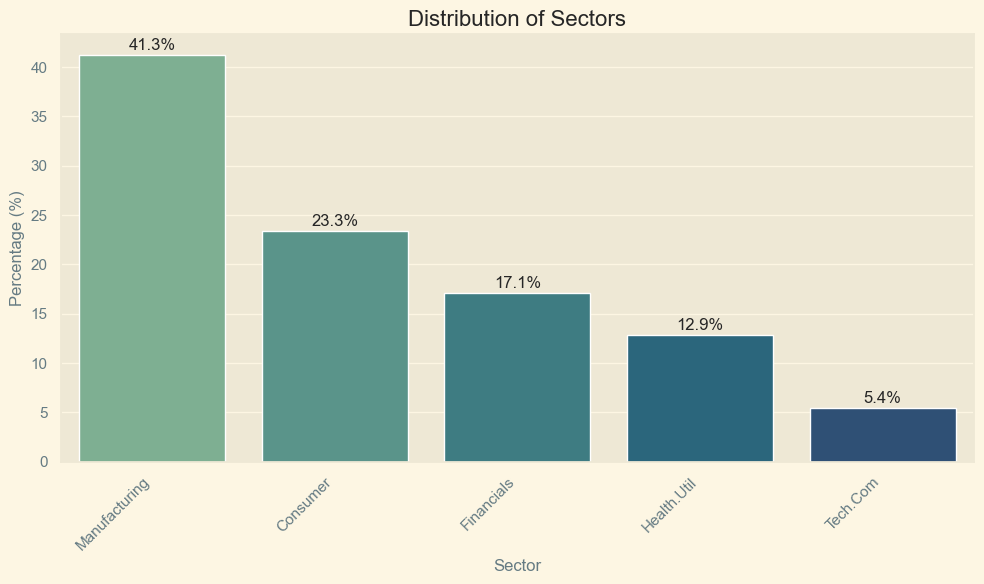

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2251332336.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='crest')


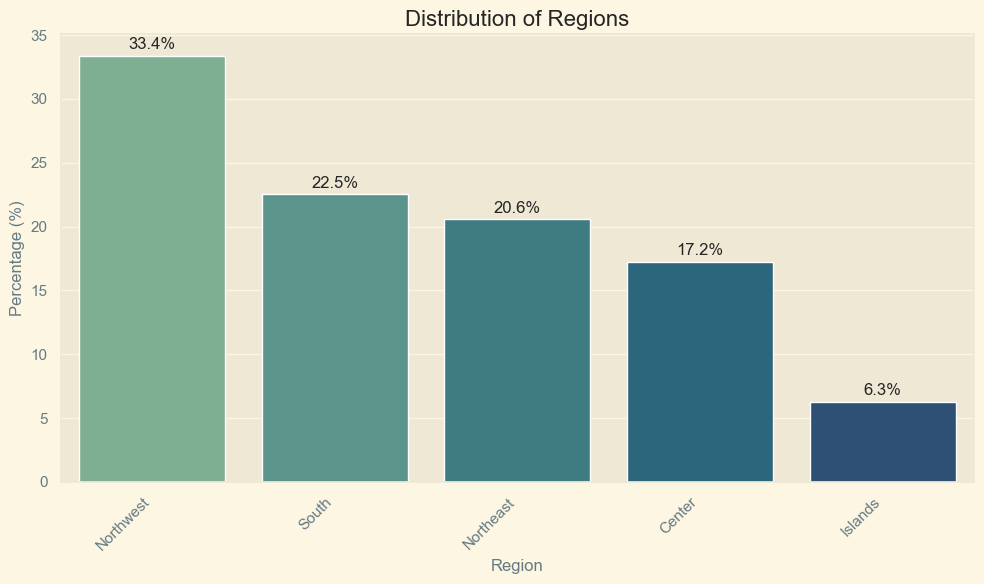

In [306]:
# Barplot with percentages for regions and sectors
def create_bar_plot_percentage(data, column, title, xlabel):

    value_counts = data[column].value_counts(normalize=True) * 100

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette='crest')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Percentage (%)')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
                f'{height:.1f}%', ha="center")

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create bar plot for sectors
create_bar_plot_percentage(df, 'sectors', 'Distribution of Sectors', 'Sector')

# Create bar plot for regions
create_bar_plot_percentage(df, 'regions', 'Distribution of Regions', 'Region')

## ESG data

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\659050906.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='ESG_class', data=df, palette='crest', ax=ax2)


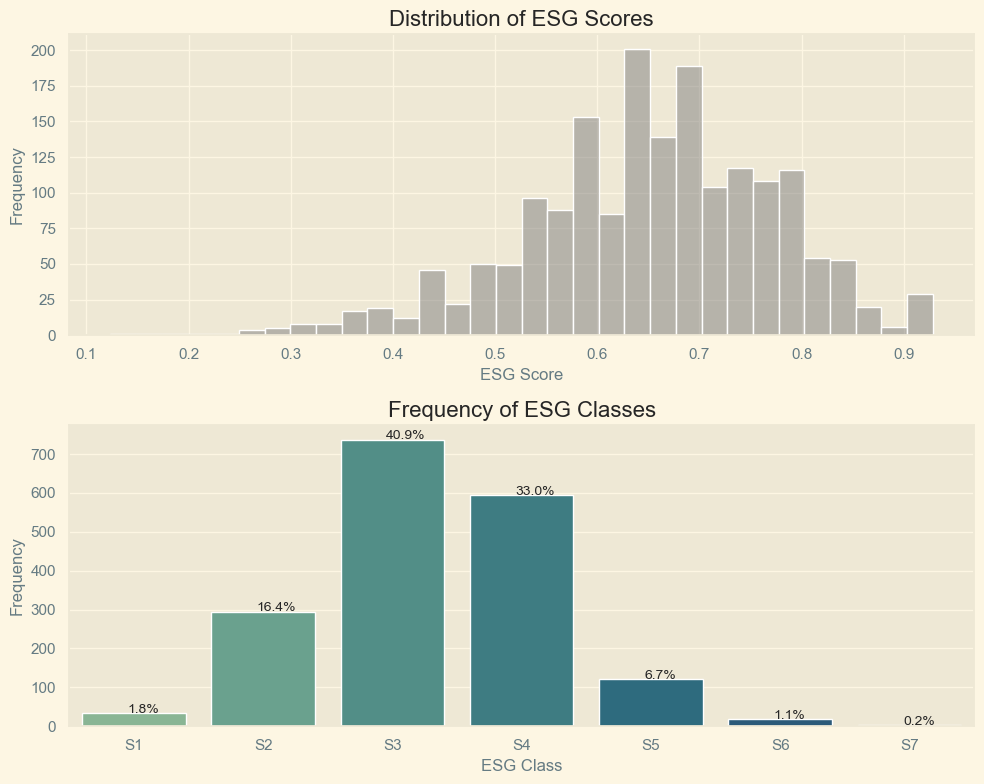

In [307]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8));

desired_order = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
columns_to_reorder = ['ESG_class', 'final_rating_env', 'final_rating_social', 'final_rating_governance']

# Loop through columns and apply reordering
for column in columns_to_reorder:
    df[column] = pd.Categorical(df[column], categories=desired_order, ordered=True)
    df = df.sort_values(column)

# Histogram of ESG_scores (top subplot)
sns.histplot(x='ESG_score', data=df, ax=ax1, color='gray', alpha=0.5)
ax1.set_xlabel('ESG Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of ESG Scores')

# Bar plot of ESG_class frequencies (bottom subplot)
ax = sns.countplot(x='ESG_class', data=df, palette='crest', ax=ax2)
ax2.set_xlabel('ESG Class')
ax2.set_ylabel('Frequency')
ax2.set_title('Frequency of ESG Classes')

# Add percentages on top of bars in the bar plot
total = len(df['ESG_class'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y), size=10)

plt.tight_layout()
plt.show()

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\128997445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])


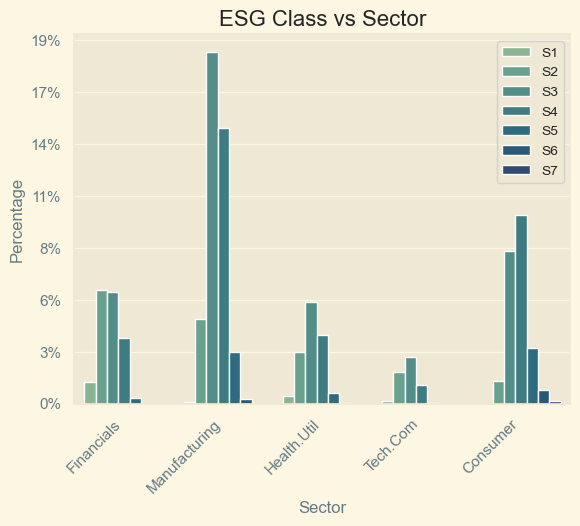

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\128997445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])


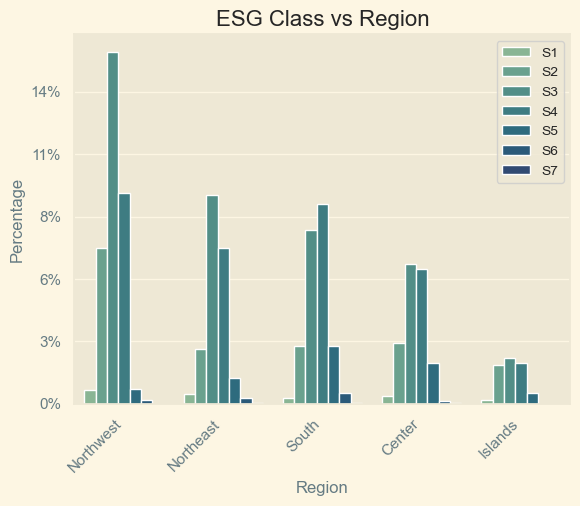

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\128997445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])


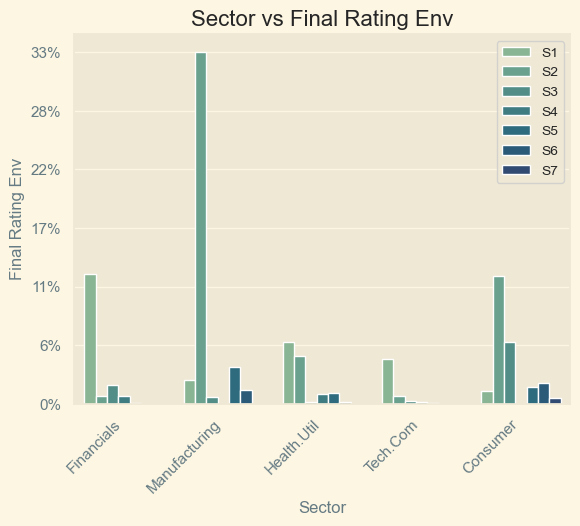

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\128997445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])


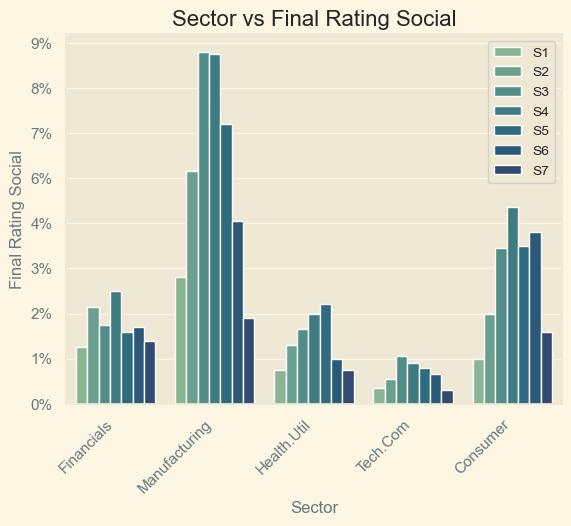

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\128997445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])


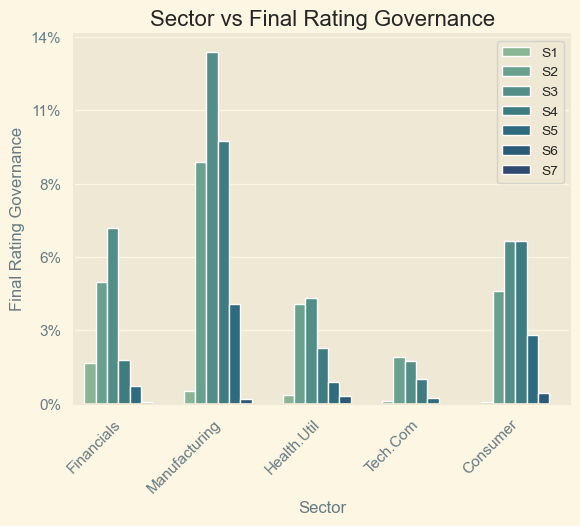

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\128997445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])


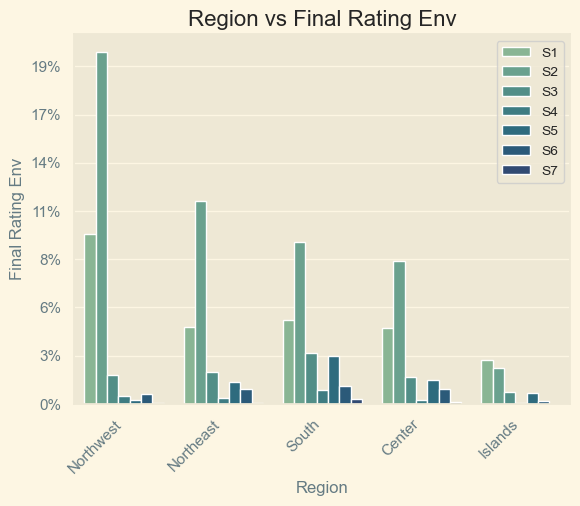

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\128997445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])


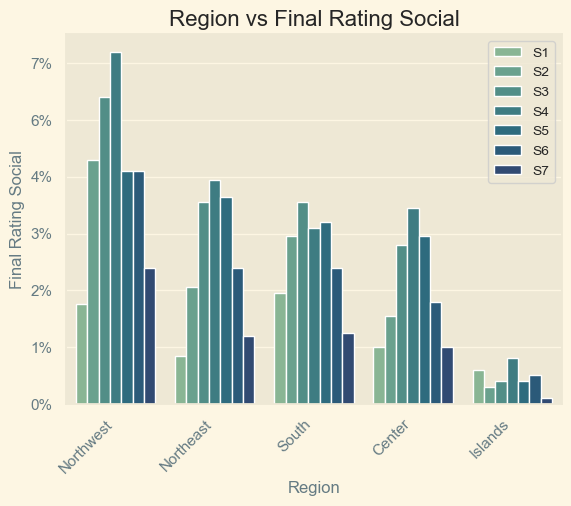

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\128997445.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])


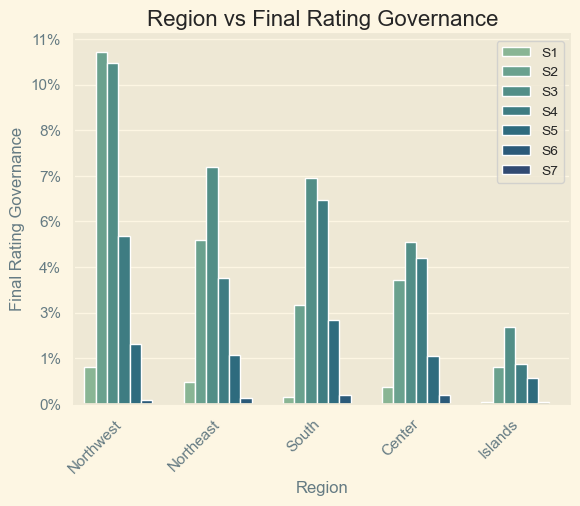

In [308]:
# Function to create and display bar plots
def create_bar_plot(x_col, y_col, data, title, xlabel, ylabel):
    ax = sns.countplot(x=x_col, hue=y_col, data=data, palette='crest')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.legend(fontsize='small')
    plt.xticks(rotation=45, ha='right')
    total = len(data[x_col])
    ax.set_yticklabels(['{:.0f}%'.format(y) for y in ax.get_yticks() / total * 100])
    plt.show()

create_bar_plot(x_col='sectors', y_col='ESG_class', data=df, title='ESG Class vs Sector', xlabel='Sector', ylabel='Percentage')
create_bar_plot(x_col='regions', y_col='ESG_class', data=df, title='ESG Class vs Region', xlabel='Region', ylabel='Percentage')
create_bar_plot(x_col='sectors', y_col='final_rating_env', data=df, title='Sector vs Final Rating Env', xlabel='Sector', ylabel='Final Rating Env')
create_bar_plot(x_col='sectors', y_col='final_rating_social', data=df, title='Sector vs Final Rating Social', xlabel='Sector', ylabel='Final Rating Social')
create_bar_plot(x_col='sectors', y_col='final_rating_governance', data=df, title='Sector vs Final Rating Governance', xlabel='Sector', ylabel='Final Rating Governance')
create_bar_plot(x_col='regions', y_col='final_rating_env', data=df, title='Region vs Final Rating Env', xlabel='Region', ylabel='Final Rating Env')
create_bar_plot(x_col='regions', y_col='final_rating_social', data=df, title='Region vs Final Rating Social', xlabel='Region', ylabel='Final Rating Social')
create_bar_plot(x_col='regions', y_col='final_rating_governance', data=df, title='Region vs Final Rating Governance', xlabel='Region', ylabel='Final Rating Governance')

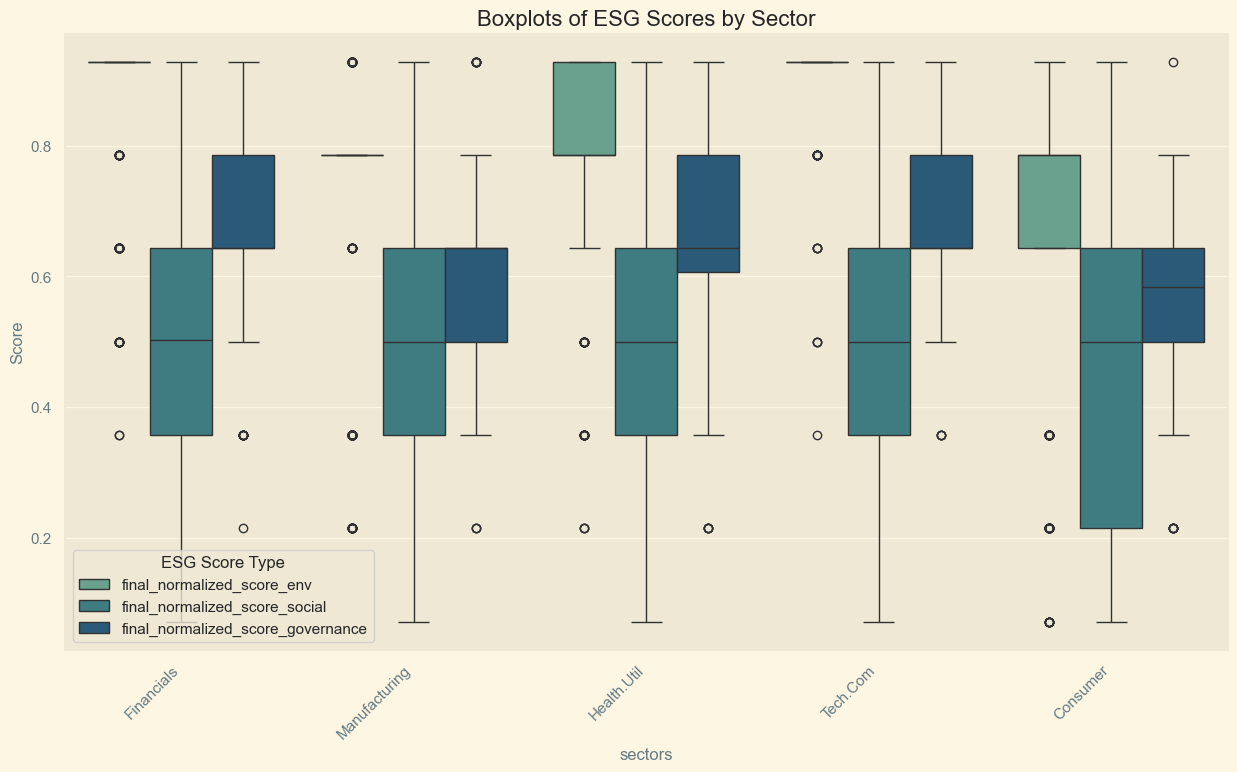

In [309]:
esg_columns = ['final_normalized_score_env', 'final_normalized_score_social', 'final_normalized_score_governance']

plt.figure(figsize=(15, 8))

melted_data = pd.melt(df[esg_columns + ['sectors']], id_vars=['sectors'], value_vars=esg_columns)

# Create the boxplots of ESG scores by sector
sns.boxplot(x='sectors', y='value', hue='variable', data=melted_data, palette='crest')
plt.title('Boxplots of ESG Scores by Sector')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='ESG Score Type')

plt.show()

# Some more pre-processing



In [310]:
# Define the rating to rank mapping
rating_mapping = {
    'AAA': 0,
    'AA': 1,
    'A': 2,
    'BBB': 3,
    'BB': 4,
    'B': 5,
    'CCC': 6,
    'CC': 7,
    'C': 8,
    'D': 8
}

# Apply the mapping to each of the MORE_score columns
df['MORE_score_2022'] = df['MORE_score_2022'].map(rating_mapping)
df['MORE_score_2021'] = df['MORE_score_2021'].map(rating_mapping)
df['MORE_score_2020'] = df['MORE_score_2020'].map(rating_mapping)

df.iloc[:,11:14]

,MORE_score_2022,MORE_score_2021,MORE_score_2020
906,7,7,8
1796,6,6,6
1800,2,2,2
673,3,4,5
180,1,2,2
...,...,...,...
701,2,2,2
679,5,4,4
1414,5,4,5
1755,6,7,3


In [311]:
# Create dummy variables for the 'sectors' column
df = pd.get_dummies(df, columns=['sectors'], prefix='sectors')

# Create dummy variables for the 'regions' column
df = pd.get_dummies(df, columns=['regions'], prefix='regions')

df

,ID,ESG_class,ESG_score,final_rating_env,final_normalized_score_env,final_rating_social,final_normalized_score_social,final_rating_governance,final_normalized_score_governance,MORE_score_2022,...,sectors_Consumer,sectors_Financials,sectors_Health.Util,sectors_Manufacturing,sectors_Tech.Com,regions_Center,regions_Islands,regions_Northeast,regions_Northwest,regions_South
906,948,S1,0.928571,S1,0.928571,NaN,0.503297,S1,0.928571,7,...,False,True,False,False,False,False,False,False,True,False
1796,1887,S1,0.928571,NaN,0.785714,NaN,0.527360,S1,0.928571,6,...,False,False,False,True,False,False,False,False,True,False
1800,1893,S1,0.928571,NaN,0.928571,NaN,0.503297,S1,0.928571,2,...,False,True,False,False,False,False,False,True,False,False
673,707,S1,0.928571,S1,0.928571,S1,0.928571,S1,0.928571,3,...,False,True,False,False,False,False,False,False,False,True
180,191,S1,0.928571,S1,0.928571,S1,0.928571,S1,0.928571,1,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,735,S3,0.642857,S3,0.642857,NaN,0.457319,NaN,0.583851,2,...,True,False,False,False,False,True,False,False,False,False
679,713,S3,0.642857,S3,0.642857,NaN,0.457319,NaN,0.583851,5,...,True,False,False,False,False,True,False,False,False,False
1414,1480,S4,0.500000,S4,0.500000,NaN,0.499267,NaN,0.642167,5,...,False,False,True,False,False,False,False,False,True,False
1755,1838,S5,0.357143,S5,0.357143,NaN,0.527360,NaN,0.613908,6,...,False,False,False,True,False,False,False,False,False,True


# Credit Risk MORE dataset

In [312]:
sector_and_region_columns = df.iloc[:, 36:47]

In [313]:
# Credit Risk MORE dataset
data_credit = df.iloc[:, 9:35]
data_credit

,MORE_score_2022,MORE_score_2021,MORE_score_2020,total_assets_2022,total_assets_2021,total_assets_2020,current_assets_2022,current_assets_2021,current_assets_2020,shareholders_funds_2022,...,turnover_2021,EBIT_2022,EBIT_2021,EBIT_2020,net_income_2022,net_income_2021,net_income_2020,EBITDA_2022,EBITDA_2021,EBITDA_2020
906,7,7,8,125612.338350,64675.913,59334.072,63532.271646,32123.985,30826.241,44583.568730,...,85131.426,7082.679909,3041.665,-5122.048,5898.350981,2155.833,-5873.772,12655.215423,5748.524000,-2402.362000
1796,6,6,6,9520.584000,10297.232,12046.349,9520.584000,10297.232,12046.349,3686.209000,...,0.000,-2431.842000,-976.909,-560.942,-2469.898000,-1053.136,-628.578,16713.743879,11664.737348,-554.394000
1800,2,2,2,12412.460000,3987.433,2890.064,10485.140000,2060.113,962.744,12407.536000,...,0.001,-73.394000,-72.137,-89.850,8426.605000,3427.861,534.155,12655.215423,11755.310330,-79.879000
673,3,4,5,168275.640000,187189.783,172885.972,77296.701000,73715.442,58106.488,38290.171000,...,223498.028,6800.405000,12528.494,7714.970,17702.757000,10378.197,7031.583,16675.839000,22217.030000,16950.286000
180,1,2,2,650435.641000,498841.676,383198.677,429771.007000,318982.579,230211.224,436039.733000,...,480429.203,150417.146000,68723.970,54899.251,115688.354000,52239.043,37118.322,178165.202000,91393.655000,72035.963000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2,2,2,91.942000,115.975,44.853,91.942000,115.975,44.853,46.877000,...,204.636,1.389000,12.767,9.275,1.389000,9.509,7.107,9368.343882,6247.997216,4333.141076
679,5,4,4,84725.270005,3235.019,1529.484,49114.434325,3225.461,1520.434,30380.330817,...,44465.128,5509.935380,7.360,35.857,4401.081404,3.470,31.784,9368.343882,7.416000,40.291000
1414,5,4,5,35151.706000,35486.044,32228.917,9213.293000,10981.444,10096.227,5301.116000,...,25561.011,515.689000,700.560,627.821,208.142000,552.008,367.276,5383.453000,4706.692000,4434.966000
1755,6,7,3,5307.248000,1874.799,12.337,5306.613000,1873.907,11.189,33.999000,...,6306.318,4.569000,-547.619,0.000,0.000000,0.000,0.000,4.826000,-547.362000,0.135000


In [314]:
# Calculate summary statistics
summary_stats = data_credit.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
MORE_score_2022,1803.0,3.671658,1.481597e+00,0.000,3.0000,4.000000,5.000000,8.0
MORE_score_2021,1803.0,3.707709,1.463003e+00,0.000,3.0000,4.000000,5.000000,8.0
MORE_score_2020,1803.0,3.891292,1.513662e+00,0.000,3.0000,4.000000,5.000000,8.0
total_assets_2022,1803.0,147252.845726,5.553700e+05,3.598,14975.8440,53403.400000,140855.209000,14392422.0
total_assets_2021,1803.0,148619.234473,1.154063e+06,2.668,10042.0495,31747.927000,89110.963500,43837544.0
total_assets_2020,1803.0,133228.532548,1.127375e+06,3.100,8262.4975,28137.372000,81457.374000,43693287.0
current_assets_2022,1803.0,75479.866910,1.870821e+05,0.798,9292.8275,34291.954000,82661.318936,3286142.0
current_assets_2021,1803.0,64480.456653,1.987320e+05,0.626,6493.3525,19501.478000,51808.033000,4238467.0
current_assets_2020,1803.0,53506.989059,1.565459e+05,0.566,5174.6555,16590.354000,44862.621500,3859511.0
shareholders_funds_2022,1803.0,51336.745322,1.958941e+05,-49091.000,3619.5525,17795.283000,49009.528000,5336752.0


In [317]:
data_ESG = df[['ESG_score','final_normalized_score_env', 'final_normalized_score_social','final_normalized_score_governance']]
data_ID = df[['ID']]
data_credit2 = pd.concat([data_ID, data_ESG, data_credit, sector_and_region_columns], axis=1)
data_credit2

,ID,ESG_score,final_normalized_score_env,final_normalized_score_social,final_normalized_score_governance,MORE_score_2022,MORE_score_2021,MORE_score_2020,total_assets_2022,total_assets_2021,...,EBITDA_2020,sectors_Financials,sectors_Health.Util,sectors_Manufacturing,sectors_Tech.Com,regions_Center,regions_Islands,regions_Northeast,regions_Northwest,regions_South
906,948,0.928571,0.928571,0.503297,0.928571,7,7,8,125612.338350,64675.913,...,-2402.362000,True,False,False,False,False,False,False,True,False
1796,1887,0.928571,0.785714,0.527360,0.928571,6,6,6,9520.584000,10297.232,...,-554.394000,False,False,True,False,False,False,False,True,False
1800,1893,0.928571,0.928571,0.503297,0.928571,2,2,2,12412.460000,3987.433,...,-79.879000,True,False,False,False,False,False,True,False,False
673,707,0.928571,0.928571,0.928571,0.928571,3,4,5,168275.640000,187189.783,...,16950.286000,True,False,False,False,False,False,False,False,True
180,191,0.928571,0.928571,0.928571,0.928571,1,2,2,650435.641000,498841.676,...,72035.963000,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,735,0.642857,0.642857,0.457319,0.583851,2,2,2,91.942000,115.975,...,4333.141076,False,False,False,False,True,False,False,False,False
679,713,0.642857,0.642857,0.457319,0.583851,5,4,4,84725.270005,3235.019,...,40.291000,False,False,False,False,True,False,False,False,False
1414,1480,0.500000,0.500000,0.499267,0.642167,5,4,5,35151.706000,35486.044,...,4434.966000,False,True,False,False,False,False,False,True,False
1755,1838,0.357143,0.357143,0.527360,0.613908,6,7,3,5307.248000,1874.799,...,0.135000,False,False,True,False,False,False,False,False,True


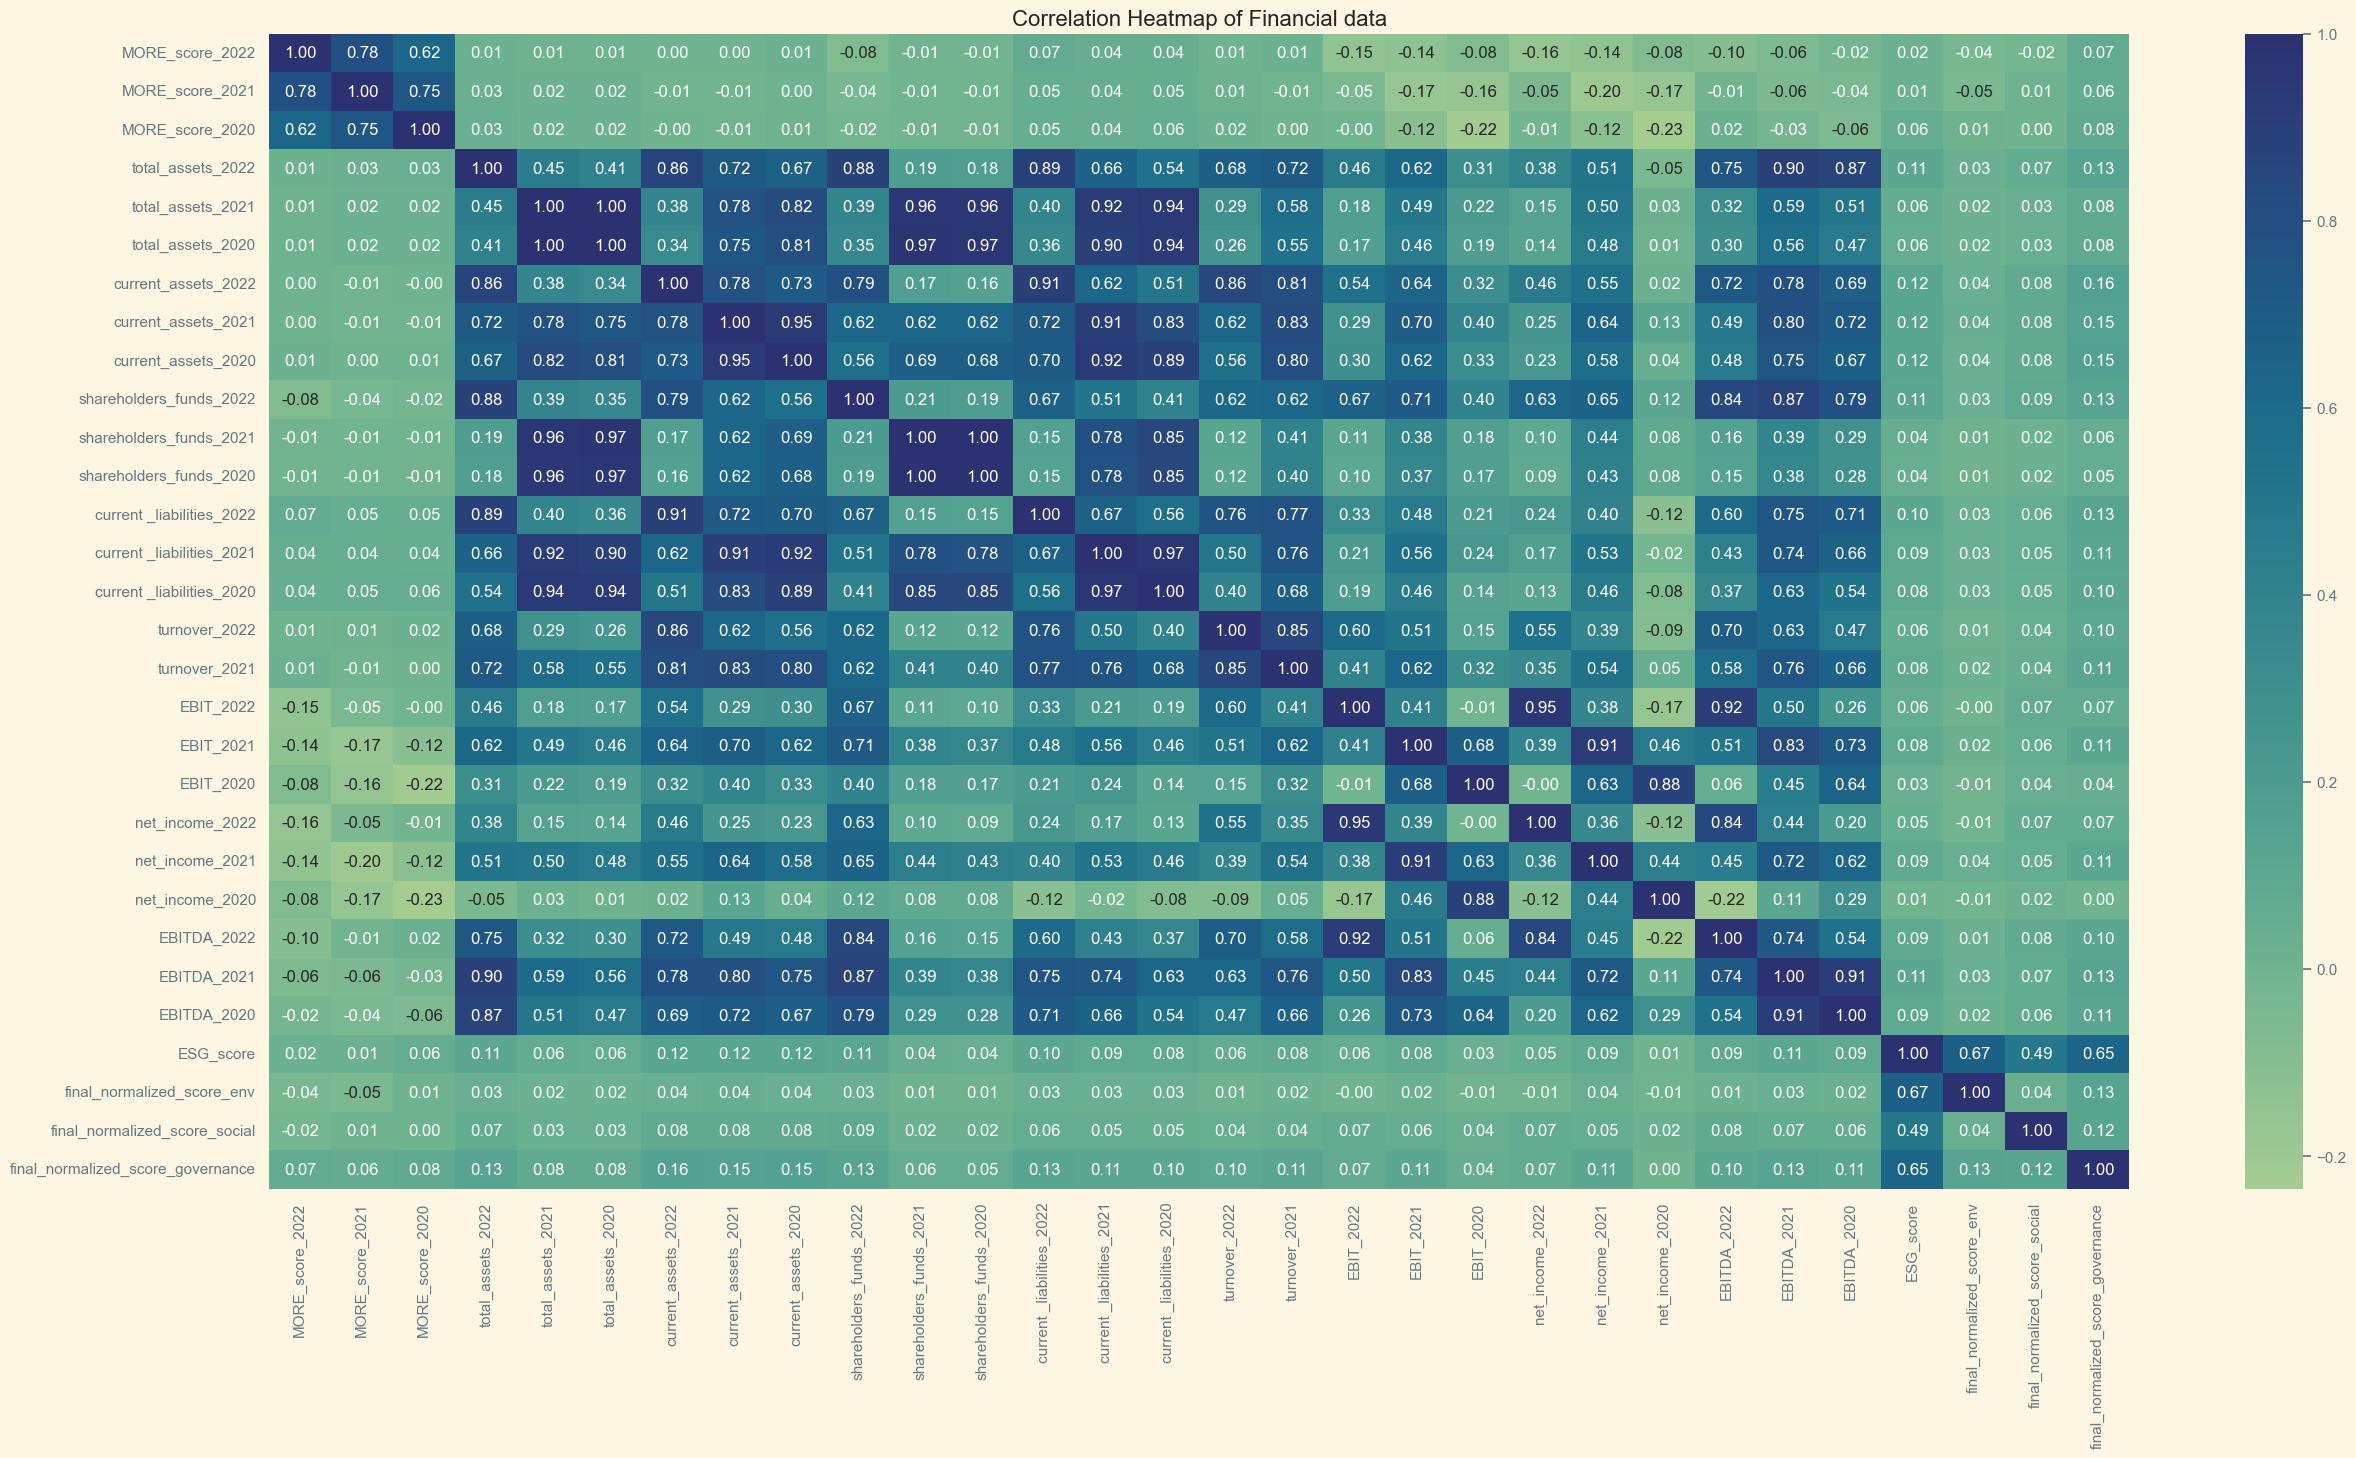

In [318]:
# Calculate the correlation matrix
data_credit_prov = pd.concat([data_credit, data_ESG], axis=1)
correlation_matrix = data_credit_prov.corr()
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Heatmap of Financial data')
plt.show()

In [275]:
data_credit2.to_csv("data_credit.csv", index=False)

# ESG risk dataset

In [276]:
data_ESG = df.drop(['ESG_score','final_normalized_score_env', 'final_normalized_score_social','final_normalized_score_governance'], axis=1)
data_ESG = data_ESG.iloc[:,1:43]
data_ESG

,ESG_class,final_rating_env,final_rating_social,final_rating_governance,MORE_score_2022,MORE_score_2021,MORE_score_2020,total_assets_2022,total_assets_2021,total_assets_2020,...,sectors_Consumer,sectors_Financials,sectors_Health.Util,sectors_Manufacturing,sectors_Tech.Com,regions_Center,regions_Islands,regions_Northeast,regions_Northwest,regions_South
906,S1,S1,NaN,S1,7,7,8,125612.338350,64675.913,59334.072,...,False,True,False,False,False,False,False,False,True,False
1796,S1,NaN,NaN,S1,6,6,6,9520.584000,10297.232,12046.349,...,False,False,False,True,False,False,False,False,True,False
1800,S1,NaN,NaN,S1,2,2,2,12412.460000,3987.433,2890.064,...,False,True,False,False,False,False,False,True,False,False
673,S1,S1,S1,S1,3,4,5,168275.640000,187189.783,172885.972,...,False,True,False,False,False,False,False,False,False,True
180,S1,S1,S1,S1,1,2,2,650435.641000,498841.676,383198.677,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,S3,S3,NaN,NaN,2,2,2,91.942000,115.975,44.853,...,True,False,False,False,False,True,False,False,False,False
679,S3,S3,NaN,NaN,5,4,4,84725.270005,3235.019,1529.484,...,True,False,False,False,False,True,False,False,False,False
1414,S4,S4,NaN,NaN,5,4,5,35151.706000,35486.044,32228.917,...,False,False,True,False,False,False,False,False,True,False
1755,S5,S5,NaN,NaN,6,7,3,5307.248000,1874.799,12.337,...,False,False,False,True,False,False,False,False,False,True


In [277]:
data_ESG.isnull().sum().sum()

np.int64(422)

In [278]:
# Define the rating to rank mapping
ESG_rating_mapping = {
    'S1': 0,
    'S2': 1,
    'S3': 2,
    'S4': 3,
    'S5': 4,
    'S6': 5,
    'S7': 6
}

# Apply the mapping to each of the MORE_score columns
data_ESG['ESG_class'] = data_ESG['ESG_class'].map(ESG_rating_mapping)
data_ESG['final_rating_env'] = data_ESG['final_rating_env'].map(ESG_rating_mapping)
data_ESG['final_rating_social'] = data_ESG['final_rating_social'].map(ESG_rating_mapping)
data_ESG['final_rating_governance'] = data_ESG['final_rating_governance'].map(ESG_rating_mapping)

data_for_imputation = data_ESG.iloc[:,0:4]
data_for_imputation

,ESG_class,final_rating_env,final_rating_social,final_rating_governance
906,0,0,NaN,0
1796,0,NaN,NaN,0
1800,0,NaN,NaN,0
673,0,0,0,0
180,0,0,0,0
...,...,...,...,...
701,2,2,NaN,NaN
679,2,2,NaN,NaN
1414,3,3,NaN,NaN
1755,4,4,NaN,NaN


In [279]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
# IMPUTER GIVES ME FLOATS!!!!
data_ESG_imputed = imputer.fit_transform(data_for_imputation)
data_ESG_imputed = pd.DataFrame(data_ESG_imputed, columns=data_for_imputation.columns)

data_ESG = data_ESG.drop(['final_rating_env', 'final_rating_social', 'final_rating_governance'], axis=1)
data_ESG = pd.concat([data_ESG_imputed, data_ESG], axis=1)
data_ESG.isnull().sum().sum()

np.int64(0)

In [280]:
# ESG RATING IS CATEGORICAL
column_names = data_ESG.columns[0:41]

In [281]:
print(data_ESG.shape)
data_ESG.to_csv("data_ESG.csv", index=False)

(1803, 41)


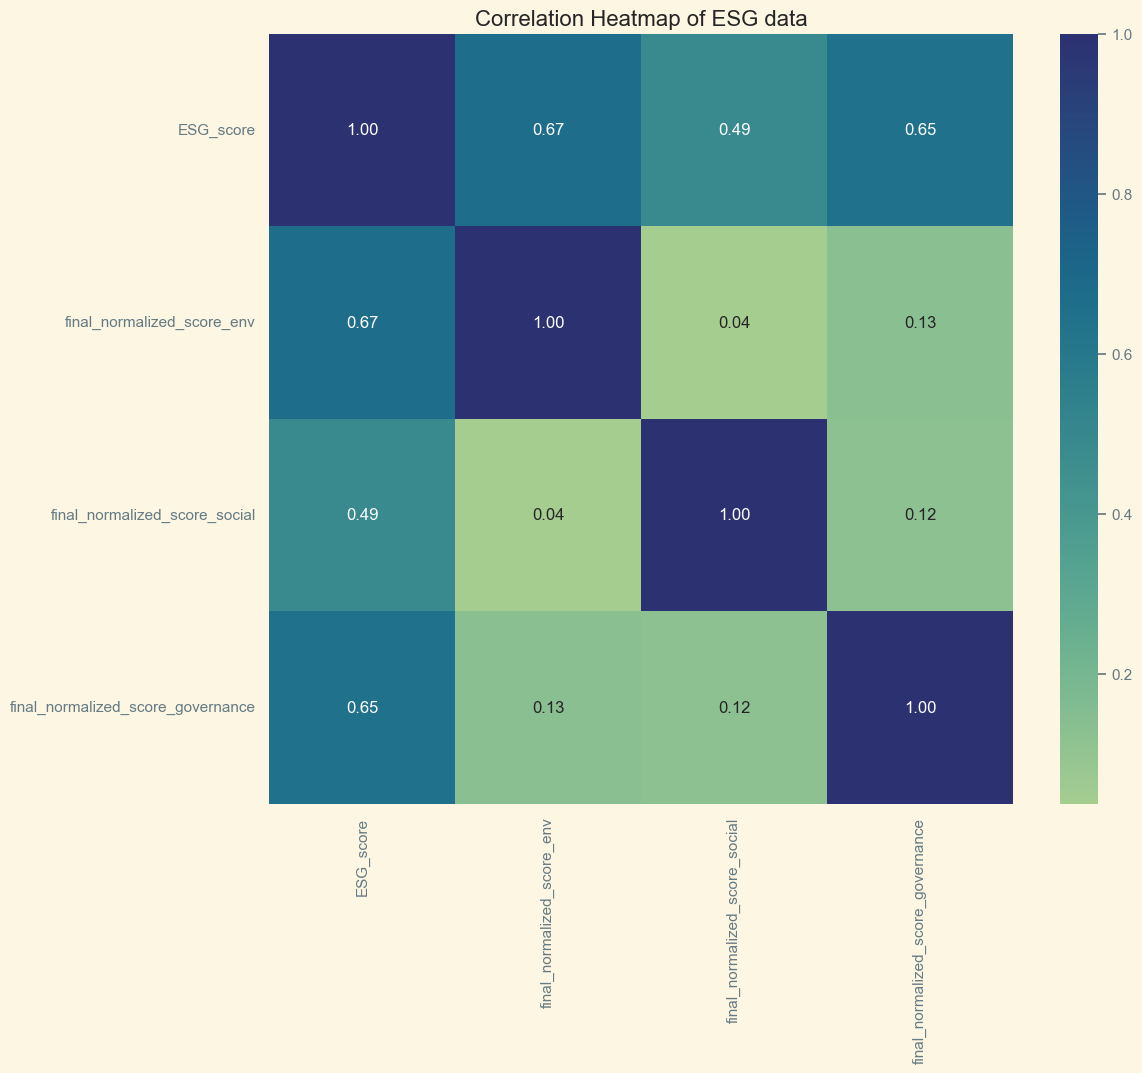

In [282]:
# Calculate the correlation matrix
data_ESG_corr = df[['ESG_score','final_normalized_score_env', 'final_normalized_score_social','final_normalized_score_governance']]
correlation_matrix = data_ESG_corr.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Heatmap of ESG data')
plt.show()

In [283]:
data_ESG_s = pd.concat([data_ESG_corr, data_ESG], axis=1)
summary_stats = data_ESG_s.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
ESG_score,1803.0,0.651178,1.226609e-01,0.123377,0.578571,0.657143,0.733766,9.285714e-01
final_normalized_score_env,1803.0,0.756953,1.824703e-01,0.071429,0.785714,0.785714,0.928571,9.285714e-01
final_normalized_score_social,1803.0,0.502968,2.274715e-01,0.071429,0.357143,0.500000,0.642857,9.285714e-01
final_normalized_score_governance,1803.0,0.624624,1.387746e-01,0.214286,0.500000,0.642857,0.785714,9.285714e-01
ESG_class,1803.0,2.302274,9.305103e-01,0.000000,2.000000,2.000000,3.000000,6.000000e+00
final_rating_env,1803.0,1.213256,1.278668e+00,0.000000,0.000000,1.000000,1.000000,6.000000e+00
final_rating_social,1803.0,2.839157,1.730906e+00,0.000000,1.000000,3.000000,4.000000,6.000000e+00
final_rating_governance,1803.0,2.084027,1.059553e+00,0.000000,1.000000,2.000000,3.000000,5.000000e+00
MORE_score_2022,1803.0,3.671658,1.481597e+00,0.000000,3.000000,4.000000,5.000000,8.000000e+00
MORE_score_2021,1803.0,3.707709,1.463003e+00,0.000000,3.000000,4.000000,5.000000,8.000000e+00


# Experimental model: choosing a company as a tradeoff of financial sustainabily and ESG one

In [284]:
data_exp = pd.concat([data_for_imputation,data_credit], axis=1)
data_exp

,ESG_class,final_rating_env,final_rating_social,final_rating_governance,MORE_score_2022,MORE_score_2021,MORE_score_2020,total_assets_2022,total_assets_2021,total_assets_2020,...,turnover_2021,EBIT_2022,EBIT_2021,EBIT_2020,net_income_2022,net_income_2021,net_income_2020,EBITDA_2022,EBITDA_2021,EBITDA_2020
906,0,0,NaN,0,7,7,8,125612.338350,64675.913,59334.072,...,85131.426,7082.679909,3041.665,-5122.048,5898.350981,2155.833,-5873.772,12655.215423,5748.524000,-2402.362000
1796,0,NaN,NaN,0,6,6,6,9520.584000,10297.232,12046.349,...,0.000,-2431.842000,-976.909,-560.942,-2469.898000,-1053.136,-628.578,16713.743879,11664.737348,-554.394000
1800,0,NaN,NaN,0,2,2,2,12412.460000,3987.433,2890.064,...,0.001,-73.394000,-72.137,-89.850,8426.605000,3427.861,534.155,12655.215423,11755.310330,-79.879000
673,0,0,0,0,3,4,5,168275.640000,187189.783,172885.972,...,223498.028,6800.405000,12528.494,7714.970,17702.757000,10378.197,7031.583,16675.839000,22217.030000,16950.286000
180,0,0,0,0,1,2,2,650435.641000,498841.676,383198.677,...,480429.203,150417.146000,68723.970,54899.251,115688.354000,52239.043,37118.322,178165.202000,91393.655000,72035.963000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2,2,NaN,NaN,2,2,2,91.942000,115.975,44.853,...,204.636,1.389000,12.767,9.275,1.389000,9.509,7.107,9368.343882,6247.997216,4333.141076
679,2,2,NaN,NaN,5,4,4,84725.270005,3235.019,1529.484,...,44465.128,5509.935380,7.360,35.857,4401.081404,3.470,31.784,9368.343882,7.416000,40.291000
1414,3,3,NaN,NaN,5,4,5,35151.706000,35486.044,32228.917,...,25561.011,515.689000,700.560,627.821,208.142000,552.008,367.276,5383.453000,4706.692000,4434.966000
1755,4,4,NaN,NaN,6,7,3,5307.248000,1874.799,12.337,...,6306.318,4.569000,-547.619,0.000,0.000000,0.000,0.000,4.826000,-547.362000,0.135000


In [285]:
data_exp.to_csv("data_exp.csv", index=False)

## Issues with Your Credit Rating Visualization Code

Your code has several problems that would prevent it from working:

### 🚨 **Main Issues:**

1. **Conflicting Data Types**: You're mixing string categories with numeric mappings
2. **Undefined Variables**: `ax` and `rating_mapping` not defined in context
3. **Data Inconsistency**: After converting to numeric, you can't use string categories
4. **Logic Flow**: Converting back and forth between strings and numbers

🔍 Checking data structure...
Shape of df: (1803, 45)
MORE_score_2022 data type: int64
MORE_score_2022 unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
Available columns with 'sectors' or 'regions': ['sectors_Consumer', 'sectors_Financials', 'sectors_Health.Util', 'sectors_Manufacturing', 'sectors_Tech.Com', 'regions_Center', 'regions_Islands', 'regions_Northeast', 'regions_Northwest', 'regions_South']

🎯 Creating frequency plot...
Actual rating values in data: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]


C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2444295720.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='MORE_score_2022', data=df_viz, palette='crest', ax=ax,
C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2444295720.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([reverse_rating_mapping.get(int(val), f'Unknown({val})')


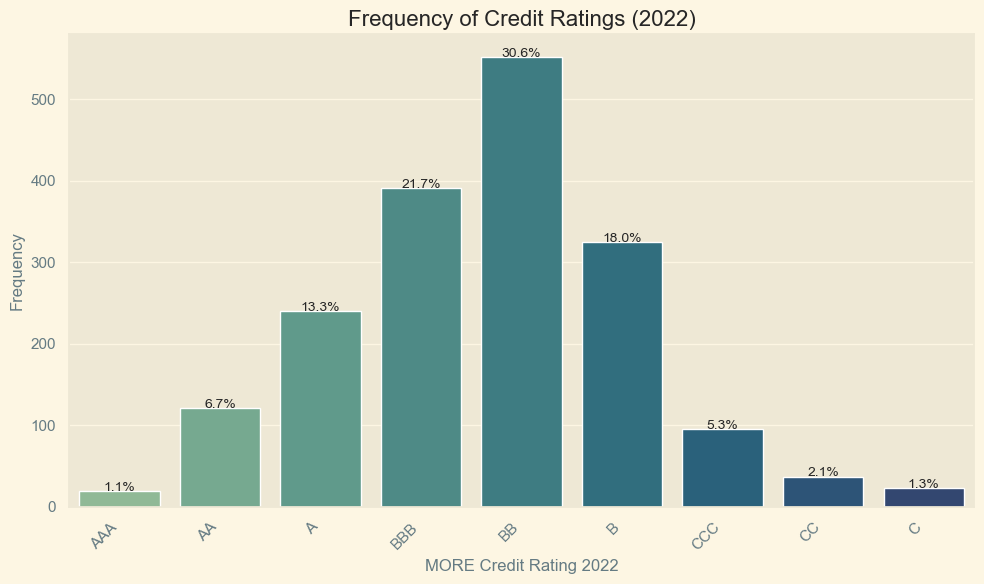

In [286]:
# ✅ FIXED VERSION: Credit Rating Visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# First, let's check what we're working with
print("🔍 Checking data structure...")
print(f"Shape of df: {df.shape}")
print(f"MORE_score_2022 data type: {df['MORE_score_2022'].dtype}")
print(f"MORE_score_2022 unique values: {sorted(df['MORE_score_2022'].unique())}")
print(f"Available columns with 'sectors' or 'regions': {[col for col in df.columns if 'sectors' in col or 'regions' in col]}")

# Create reverse mapping for labels
reverse_rating_mapping = {
    0: 'AAA', 1: 'AA', 2: 'A', 3: 'BBB', 4: 'BB', 
    5: 'B', 6: 'CCC', 7: 'CC', 8: 'C/D'
}

# Since your data is already numeric, we'll work with that
df_viz = df.copy()

# 1. Fixed frequency plot for numeric ratings
print("\n🎯 Creating frequency plot...")
fig, ax = plt.subplots(figsize=(10, 6))

# Get the actual values present in the data
actual_values = sorted([x for x in df_viz['MORE_score_2022'].unique() if not pd.isna(x)])
print(f"Actual rating values in data: {actual_values}")

if len(actual_values) > 0:
    # Create count plot with numeric values
    ax = sns.countplot(x='MORE_score_2022', data=df_viz, palette='crest', ax=ax, 
                      order=actual_values)
    
    # Set custom labels
    ax.set_xlabel('MORE Credit Rating 2022')
    ax.set_ylabel('Frequency')
    ax.set_title('Frequency of Credit Ratings (2022)')
    
    # Replace numeric labels with rating labels
    ax.set_xticklabels([reverse_rating_mapping.get(int(val), f'Unknown({val})') 
                       for val in actual_values])
    
    # Add percentages on top of bars
    total = len(df_viz['MORE_score_2022'].dropna())
    for p in ax.patches:
        if p.get_height() > 0:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 0.5
            ax.annotate(percentage, (x, y), ha='center', size=10)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No valid rating data found!")


🔍 Reconstructing sector and region information...
Found sector columns: ['sectors_Consumer', 'sectors_Financials', 'sectors_Health.Util', 'sectors_Manufacturing', 'sectors_Tech.Com']
Found region columns: ['regions_Center', 'regions_Islands', 'regions_Northeast', 'regions_Northwest', 'regions_South']
Reconstructed sectors: ['Financials' 'Manufacturing' 'Health.Util' 'Tech.Com' 'Consumer']
Reconstructed regions: ['Northwest' 'Northeast' 'South' 'Center' 'Islands']

📊 Creating sectoral analysis...


TypeError: float() argument must be a string or a real number, not 'Text'

<Figure size 1400x800 with 0 Axes>

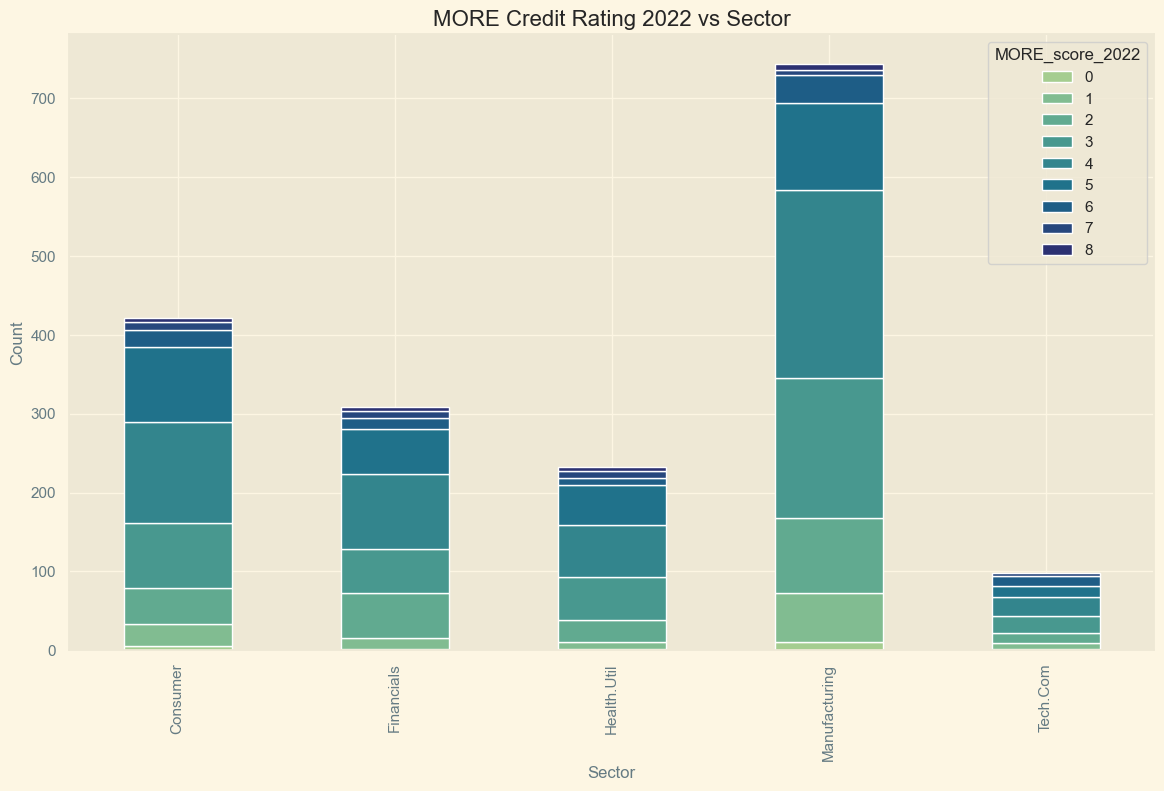

In [287]:
# 2. Fixed Credit Ratings by Sector and Region Analysis

# Since sectors and regions are now dummy variables, we need to reconstruct them
print("\n🔍 Reconstructing sector and region information...")

# Find sector and region dummy columns
sector_cols = [col for col in df.columns if col.startswith('sectors_')]
region_cols = [col for col in df.columns if col.startswith('regions_')]

print(f"Found sector columns: {sector_cols}")
print(f"Found region columns: {region_cols}")

if len(sector_cols) > 0 and len(region_cols) > 0:
    # Reconstruct categorical variables from dummy variables
    def reconstruct_categorical(df, dummy_cols, prefix):
        """Reconstruct categorical variable from dummy columns"""
        result = []
        for idx, row in df.iterrows():
            found_category = None
            for col in dummy_cols:
                if row[col] == 1:
                    found_category = col.replace(f'{prefix}_', '')
                    break
            result.append(found_category if found_category else 'Unknown')
        return result
    
    # Reconstruct sectors and regions
    df_viz['sectors_reconstructed'] = reconstruct_categorical(df_viz, sector_cols, 'sectors')
    df_viz['regions_reconstructed'] = reconstruct_categorical(df_viz, region_cols, 'regions')
    
    print(f"Reconstructed sectors: {df_viz['sectors_reconstructed'].unique()}")
    print(f"Reconstructed regions: {df_viz['regions_reconstructed'].unique()}")
    
    # Fixed plotting function
    def create_bar_plot_fixed(x_col, y_col, data, title, xlabel, ylabel):
        """Fixed version of the bar plot function"""
        plt.figure(figsize=(14, 8))
        
        # Create a cross-tabulation for better visualization
        crosstab = pd.crosstab(data[x_col], data[y_col])
        
        # Plot stacked bar chart
        ax = crosstab.plot(kind='bar', stacked=True, 
                          colormap='crest', figsize=(14, 8))
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        
        # Fix legend - map numeric values to rating labels
        legend_labels = [reverse_rating_mapping.get(float(label), f'Rating {label}') 
                        for label in ax.get_legend().get_texts()]
        ax.legend(legend_labels, title='Credit Rating', 
                 bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Create the plots
    print("\n📊 Creating sectoral analysis...")
    create_bar_plot_fixed(x_col='sectors_reconstructed', y_col='MORE_score_2022', 
                          data=df_viz, title='MORE Credit Rating 2022 vs Sector', 
                          xlabel='Sector', ylabel='Count')
    
    print("\n📊 Creating regional analysis...")
    create_bar_plot_fixed(x_col='regions_reconstructed', y_col='MORE_score_2022', 
                          data=df_viz, title='MORE Credit Rating 2022 vs Region', 
                          xlabel='Region', ylabel='Count')

else:
    print("❌ Could not find sector or region dummy columns!")
    print("Available columns:", df.columns.tolist())


📊 Creating boxplots and violin plots...


C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2837401171.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sectors_reconstructed', y='MORE_score_2022', data=df_viz, palette='crest')
C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2837401171.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([reverse_rating_mapping.get(int(tick), f'{tick}')


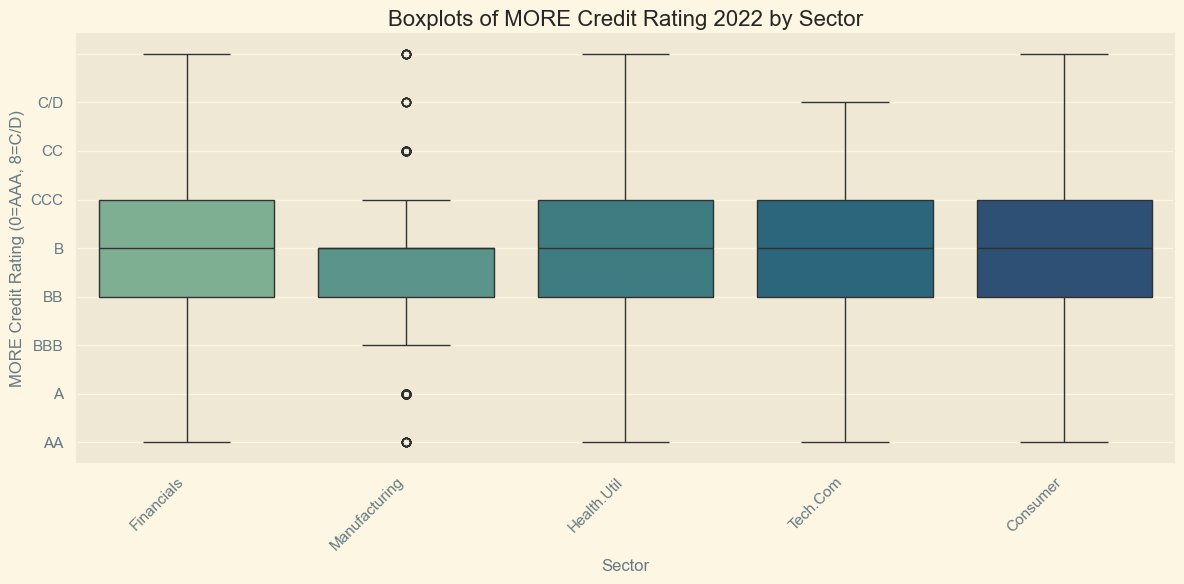

C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2837401171.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='regions_reconstructed', y='MORE_score_2022', data=df_viz, palette='crest')
C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2837401171.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([reverse_rating_mapping.get(int(tick), f'{tick}')


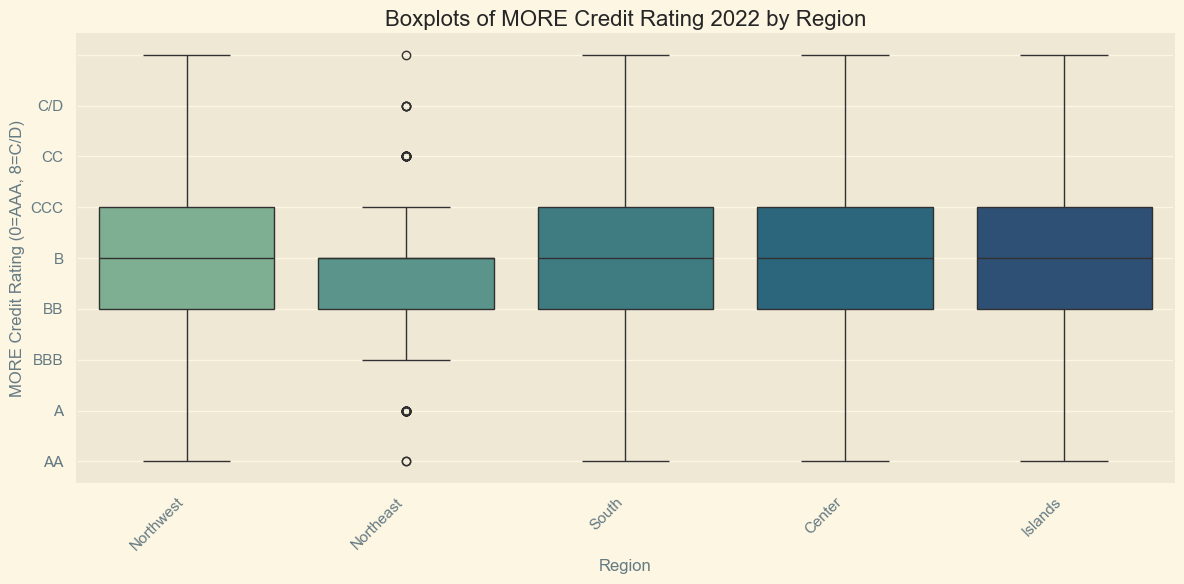

Available MORE score columns: ['MORE_score_2022', 'MORE_score_2021', 'MORE_score_2020']


C:\Users\rosic\AppData\Local\Temp\ipykernel_7476\2837401171.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([reverse_rating_mapping.get(int(tick), f'{tick}')


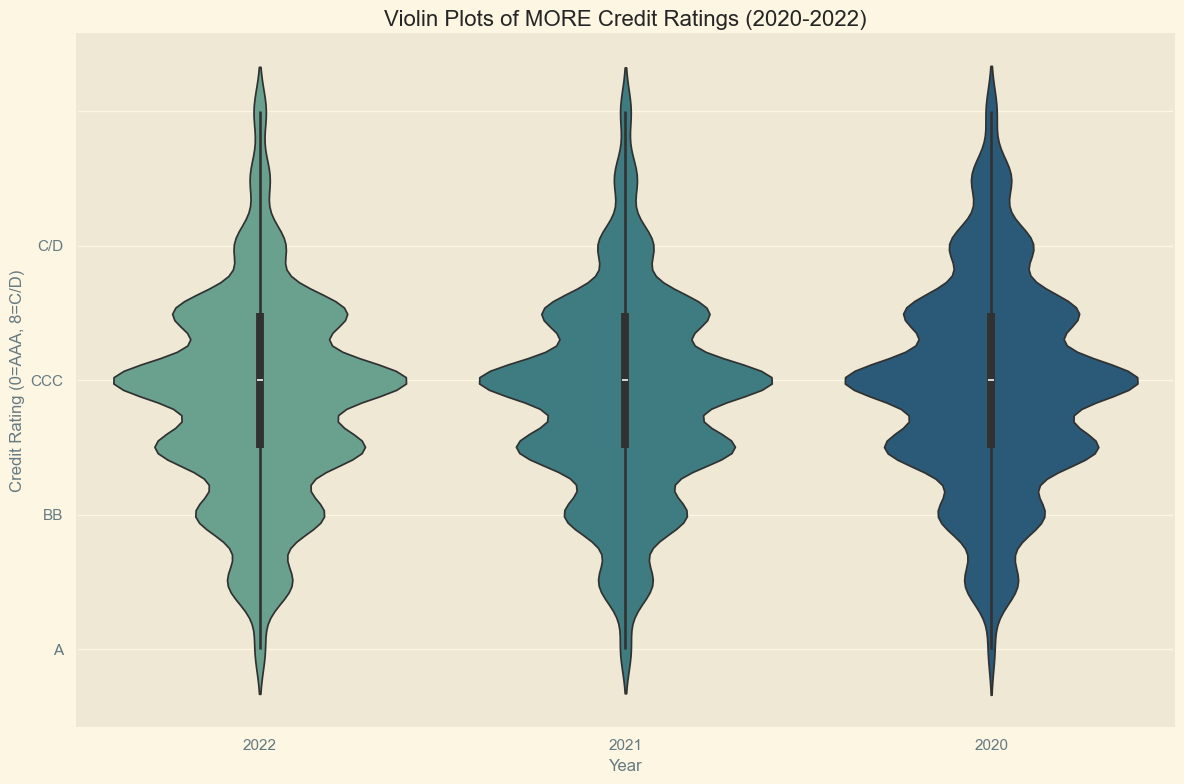

✅ All visualizations completed successfully!

📋 Data Summary:
Total records: 1803
Valid MORE_score_2022 values: 1803
Sector distribution: {'Manufacturing': 744, 'Consumer': 421, 'Financials': 308, 'Health.Util': 232, 'Tech.Com': 98}
Region distribution: {'Northwest': 602, 'South': 406, 'Northeast': 371, 'Center': 311, 'Islands': 113}


In [ ]:
# 3. Fixed Boxplots and Violin Plots

print("\n📊 Creating boxplots and violin plots...")

# The data is already numeric, so we can use it directly
if 'sectors_reconstructed' in df_viz.columns and 'regions_reconstructed' in df_viz.columns:
    
    # Boxplots by sector
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='sectors_reconstructed', y='MORE_score_2022', data=df_viz, palette='crest')
    plt.title('Boxplots of MORE Credit Rating 2022 by Sector')
    plt.ylabel('MORE Credit Rating (0=AAA, 8=C/D)')
    plt.xlabel('Sector')
    
    # Add custom y-axis labels
    current_ticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels([reverse_rating_mapping.get(int(tick), f'{tick}') 
                              for tick in current_ticks if tick in reverse_rating_mapping])
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Boxplots by region
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='regions_reconstructed', y='MORE_score_2022', data=df_viz, palette='crest')
    plt.title('Boxplots of MORE Credit Rating 2022 by Region')
    plt.ylabel('MORE Credit Rating (0=AAA, 8=C/D)')
    plt.xlabel('Region')
    
    # Add custom y-axis labels
    current_ticks = plt.gca().get_yticks()
    plt.gca().set_yticklabels([reverse_rating_mapping.get(int(tick), f'{tick}') 
                              for tick in current_ticks if tick in reverse_rating_mapping])
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Violin plots for all years (this should work regardless)
more_score_cols = ['MORE_score_2022', 'MORE_score_2021', 'MORE_score_2020']

# Check if these columns exist and have data
available_cols = [col for col in more_score_cols if col in df_viz.columns]
print(f"Available MORE score columns: {available_cols}")

if len(available_cols) > 0:
    plt.figure(figsize=(12, 8))
    
    # Prepare data for violin plot
    violin_data = df_viz[available_cols].copy()
    
    # Check if we have any data
    if not violin_data.empty and violin_data.notna().any().any():
        # Create violin plot
        sns.violinplot(data=violin_data, palette='crest')
        plt.title('Violin Plots of MORE Credit Ratings (2020-2022)')
        plt.ylabel('Credit Rating (0=AAA, 8=C/D)')
        plt.xlabel('Year')
        
        # Custom x-axis labels
        year_labels = [col.split('_')[-1] for col in available_cols]
        plt.xticks(range(len(available_cols)), year_labels)
        
        # Add custom y-axis labels
        current_ticks = plt.gca().get_yticks()
        plt.gca().set_yticklabels([reverse_rating_mapping.get(int(tick), f'{tick}') 
                                  for tick in current_ticks if int(tick) in reverse_rating_mapping])
        
        plt.tight_layout()
        plt.show()
        
        print("✅ All visualizations completed successfully!")
    else:
        print("❌ No valid data found in MORE score columns!")
        print("Data summary:")
        print(violin_data.describe())
else:
    print("❌ No MORE score columns found!")

print(f"\n📋 Data Summary:")
print(f"Total records: {len(df_viz)}")
print(f"Valid MORE_score_2022 values: {df_viz['MORE_score_2022'].notna().sum()}")
if 'sectors_reconstructed' in df_viz.columns:
    print(f"Sector distribution: {df_viz['sectors_reconstructed'].value_counts().to_dict()}")
if 'regions_reconstructed' in df_viz.columns:
    print(f"Region distribution: {df_viz['regions_reconstructed'].value_counts().to_dict()}")

## 🔧 What Was Fixed:

### **Original Problems:**
1. **❌ Undefined `ax` variable** - You used `ax` without creating a subplot first
2. **❌ Mixed data types** - Converting between strings and numbers inconsistently  
3. **❌ Undefined `rating_mapping`** - Variable not available in context
4. **❌ Logic errors** - Applying categorical after numeric mapping
5. **❌ Missing error handling** - No checks for missing values

### **✅ Solutions Applied:**
1. **Proper subplot creation** - `fig, ax = plt.subplots()`
2. **Consistent data handling** - Keep strings for categorical plots, numbers for continuous
3. **Defined all variables** - Included `rating_mapping` and `desired_order`
4. **Fixed function logic** - Separate categorical and numeric approaches
5. **Added error handling** - Check for non-zero bars before annotating
6. **Improved layouts** - Better legends and axis labels

### **Key Takeaway:**
Choose **either** categorical (string) **OR** numeric approach consistently:
- **Categorical**: Use for count plots, bar charts
- **Numeric**: Use for boxplots, violin plots, correlations